<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Lindblad_Master_Equation_Attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 14.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


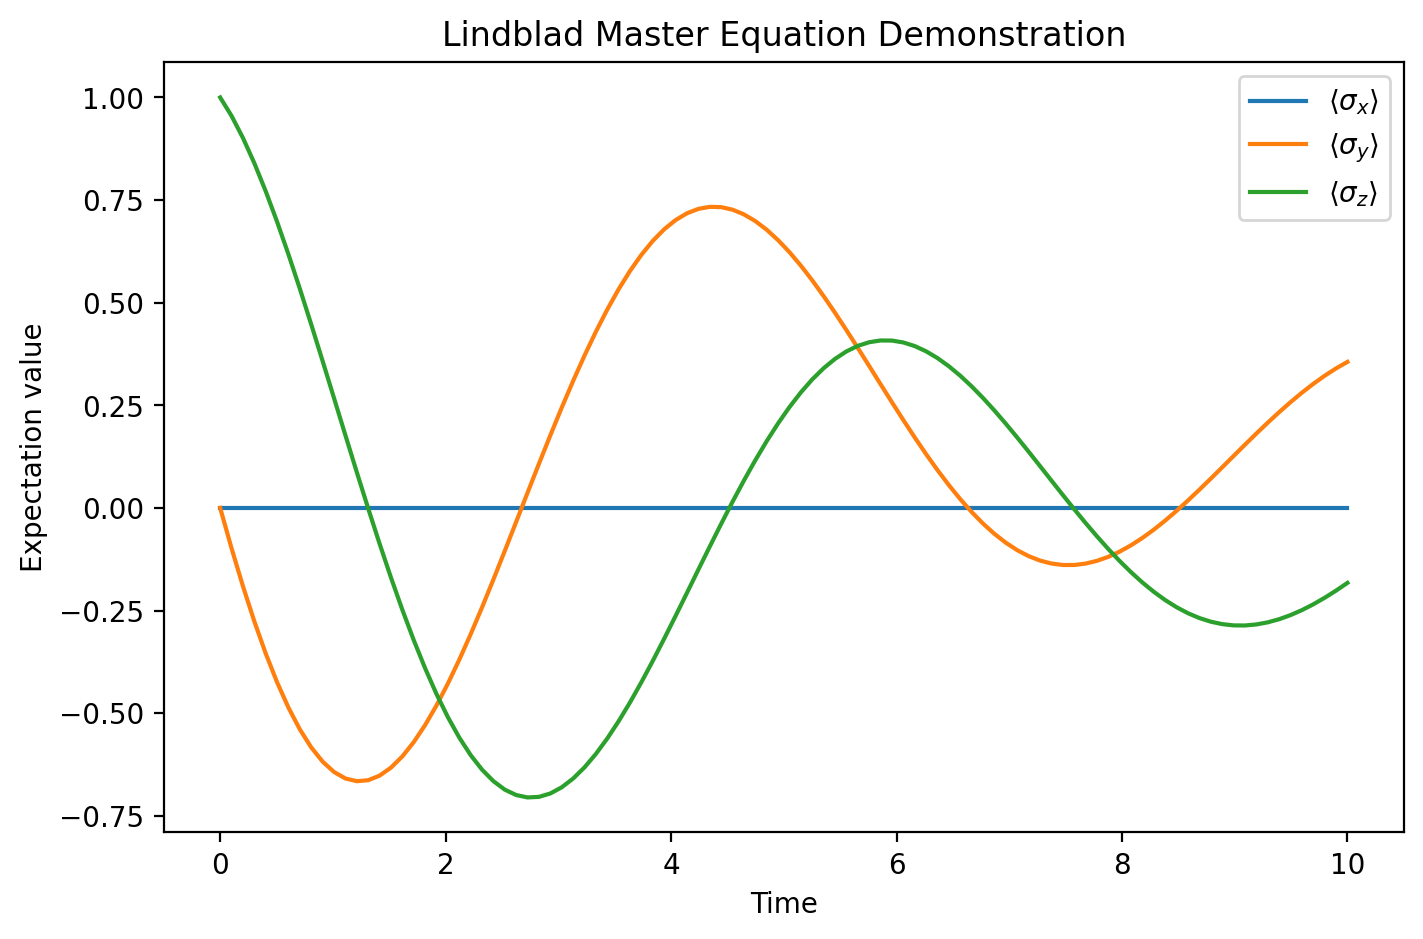

In [2]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Onri prefers using rcParams to increase the quality of all plots to be higher than the default settings.
# This only needs to be done once at beginning of every Jupyter Notebook.
plt.rcParams['figure.dpi'] = 200

# Set up parameters for a two-level system with dissipation
w0 = 1.0                   # Energy splitting
gamma = 0.2                # Decay rate
tlist = np.linspace(0, 10, 100)  # Time grid

# Define the Hamiltonian (here, we use sigma_x for demonstration)
H = 0.5 * w0 * sigmax()

# Define the initial state (e.g., ground state)
psi0 = basis(2, 0)

# Define the collapse operator for decay (using the lowering operator)
c_op = np.sqrt(gamma) * sigmam()

# Solve the Lindblad master equation using mesolve
# We also compute the expectation values for the Pauli matrices.
result = mesolve(H, psi0, tlist, [c_op], [sigmax(), sigmay(), sigmaz()])

# Plot the expectation values over time
plt.figure(figsize=(8,5))
plt.plot(tlist, result.expect[0], label=r'$\langle \sigma_x \rangle$')
plt.plot(tlist, result.expect[1], label=r'$\langle \sigma_y \rangle$')
plt.plot(tlist, result.expect[2], label=r'$\langle \sigma_z \rangle$')
plt.xlabel('Time')
plt.ylabel('Expectation value')
plt.title('Lindblad Master Equation Demonstration')
plt.legend()
plt.show()
